
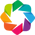

In [1]:
import holoviews as hv
import numpy as np
import datashader as ds
from holoviews.operation.datashader import datashade, dynspread
from holoviews.operation import decimate
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))
hv.extension(case_sensitive_completion=True)
hv.extension('bokeh')
from readout_ep_output import walk_ep_dirs_old, extract_data_from_ep_dirs
decimate.max_samples=1000
dynspread.max_px=20
dynspread.threshold=0.5

In [2]:
directory = r'X:\David\THY_1_GCaMP_BEFOREAFTER_TAC_290517\results'
list_of_wanted = ['C_df']
df = extract_data_from_ep_dirs(directory=directory, file_end=r"*compiled.mat",
                                   list_of_wanted=list_of_wanted)
df.head()

X:\David\THY_1_GCaMP_BEFOREAFTER_TAC_290517\results\028\HYPO\DAY_0\EXP_STIM\FOV_1\028_data_with_compiled.mat
X:\David\THY_1_GCaMP_BEFOREAFTER_TAC_290517\results\028\HYPO\DAY_0\EXP_STIM\FOV_3\028_data_with_compiled.mat
X:\David\THY_1_GCaMP_BEFOREAFTER_TAC_290517\results\028\HYPO\DAY_0\EXP_STIM\FOV_2\028_data_with_compiled.mat
X:\David\THY_1_GCaMP_BEFOREAFTER_TAC_290517\results\028\HYPO\DAY_0\EXP_STIM\FOV_4\028_data_with_compiled.mat
X:\David\THY_1_GCaMP_BEFOREAFTER_TAC_290517\results\029\HYPER\DAY_0\EXP_STIM\FOV_1\029_data_with_compiled.mat
X:\David\THY_1_GCaMP_BEFOREAFTER_TAC_290517\results\029\HYPER\DAY_0\EXP_STIM\FOV_2\029_data_with_compiled.mat
X:\David\THY_1_GCaMP_BEFOREAFTER_TAC_290517\results\029\HYPER\DAY_0\EXP_STIM\FOV_3\029_data_with_compiled.mat
X:\David\THY_1_GCaMP_BEFOREAFTER_TAC_290517\results\030\HYPO\DAY_0\EXP_STIM\FOV_1\030_data_with_compiled.mat
X:\David\THY_1_GCaMP_BEFOREAFTER_TAC_290517\results\030\HYPO\DAY_0\EXP_STIM\FOV_2\030_data_with_compiled.mat
X:\David\THY_1_G

C_df
animalID conditionID daysAfterBaseline FOV                                                   
28       HYPO        0                 1    [0.310460993798, 0.284724281161, 0.26121582440...
                                       1    [0.0150010871298, 0.0150010870999, 0.015001087...
                                       1    [4.06330635704e-09, 3.82972949084e-09, 3.60961...
                                       1    [2.9391492403e-07, 0.0258326949384, 0.02808068...
                                       1    [1.14777082083, 1.03822048242, 0.939126305143,...

In [6]:
%%opts Curve [width=500 height=400 tools=['hover']]

ids = np.unique(df.index.get_level_values('animalID'))
conds = np.unique(df.index.get_level_values('conditionID'))
days = np.unique(df.index.get_level_values('daysAfterBaseline'))

gridspace = hv.GridSpace(kdims=['Day', 'Condition'], group='Individual Mice', label='Calcium Traces')

for day in days:
    for cond in conds:
        holomap = hv.HoloMap(kdims=['Mouse ID'])
        for mid in ids:
            cur_data = df.xs(key=[mid, cond, day], level=[0, 1, 2])
            if cur_data.shape[0] > 0:
                traces = {idx: hv.Curve([np.arange(5400), row[1]]).opts(style={'alpha': 0.5})
                          for idx, row in enumerate(cur_data.itertuples())}
                means = hv.Curve((np.arange(5400), cur_data.loc[:, 'C_df'].mean(axis=0)), 
                                 group='Traces', label='Mean Trace').opts(style={'color': 'black'})
                ndoverlay = hv.NdOverlay(traces, kdims=['Neuron Number']).relabel(group='Traces', label='Raw_Traces', depth=1)
                overlay = ndoverlay * means
                holomap[mid] = overlay
            if mid in holomap.keys():
                gridspace[day, cond] = holomap
gridspace

:GridSpace   [Day,Condition]
   :HoloMap   [Mouse ID]
      :Overlay
         .Traces.Raw_Traces :NdOverlay   [Neuron Number]
            :Curve   [x]   (y)
         .Traces.Mean_Trace :Curve   [x]   (y)

In [8]:
cur_data = df.xs(key=[mid, cond, day], level=[0, 1, 2])
for row in cur_data.loc[:].itertuples():
    print(row[1][:10])

AttributeError: 'Series' object has no attribute 'itertuples'